#***Important Libraries***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

SyntaxError: invalid syntax (basedatatypes.py, line 3376)

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#reading the dataset and storing
dataframe = pd.read_csv('unemployement.csv')
dataframe.head()

,Region,States,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Frequency,Date,longitude,latitude
0,South,Andhra Pradesh,5.48,16635535,41.02,M,31-01-2020,15.9129,79.74
1,South,Andhra Pradesh,5.83,16545652,40.90,M,29-02-2020,15.9129,79.74
2,South,Andhra Pradesh,5.79,15881197,39.18,M,31-03-2020,15.9129,79.74
3,South,Andhra Pradesh,20.51,11336911,33.10,M,30-04-2020,15.9129,79.74
4,South,Andhra Pradesh,17.43,12988845,36.46,M,31-05-2020,15.9129,79.74


In [5]:
#display shape
dataframe.shape

(267, 9)

In [6]:
#information of Datasets
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   States                                   267 non-null    object 
 2   Estimated Unemployment Rate (%)          267 non-null    float64
 3   Estimated Employed                       267 non-null    int64  
 4   Estimated Labour Participation Rate (%)  267 non-null    float64
 5   Frequency                                267 non-null    object 
 6   Date                                     267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
#checking for null values
dataframe.isnull().sum()

Region                                     0
States                                     0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Frequency                                  0
Date                                       0
longitude                                  0
latitude                                   0
dtype: int64

#No null values were found, so there was no need to handle them.

In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataframe.head())


First few rows of the dataset:
  Region          States  Estimated Unemployment Rate (%)  Estimated Employed  \
0  South  Andhra Pradesh                             5.48            16635535   
1  South  Andhra Pradesh                             5.83            16545652   
2  South  Andhra Pradesh                             5.79            15881197   
3  South  Andhra Pradesh                            20.51            11336911   
4  South  Andhra Pradesh                            17.43            12988845   

   Estimated Labour Participation Rate (%) Frequency         Date  longitude  \
0                                    41.02         M   31-01-2020    15.9129   
1                                    40.90         M   29-02-2020    15.9129   
2                                    39.18         M   31-03-2020    15.9129   
3                                    33.10         M   30-04-2020    15.9129   
4                                    36.46         M   31-05-2020    15.9129   

 

In [9]:
    # Check the data types of each column
    print("\nData types of each column:")
    print(dataframe.dtypes)



Data types of each column:
Region                                      object
States                                      object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Frequency                                   object
Date                                        object
longitude                                  float64
latitude                                   float64
dtype: object


# Identify quantitative and qualitative columns

In [12]:
quantitative_cols = []
qualitative_cols = []

for column in dataframe.columns:
    if pd.api.types.is_numeric_dtype(dataframe[column]):
        quantitative_cols.append(column)
    else:
        qualitative_cols.append(column)

print("\nQuantitative columns:")
print(quantitative_cols)

print("\nQualitative columns:")
print(qualitative_cols)


Quantitative columns:
['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'longitude', 'latitude']

Qualitative columns:
['Region', 'States', 'Frequency', 'Date']


# Identify measurement scale of each column

In [13]:
# the measurement scale of each column
def get_measurement_scale(data):
    scale_dict = {}
    for column in data.columns:
        unique_values = data[column].nunique()
        total_values = data[column].count()
        if pd.api.types.is_numeric_dtype(data[column]):
            if unique_values == total_values:  # Ratio scale
                scale_dict[column] = "Ratio"
            else:  # Interval scale
                scale_dict[column] = "Interval"
        else:
            if unique_values == total_values:  # Nominal scale
                scale_dict[column] = "Nominal"
            else:  # Ordinal scale
                scale_dict[column] = "Ordinal"
    return scale_dict

# Get the measurement scale of each column
measurement_scale = get_measurement_scale(dataframe)

# Display the measurement scale of each column
print("\nMeasurement scale of each column:")
for column, scale in measurement_scale.items():
    print("\n"f"{column}: {scale}")



Measurement scale of each column:

Region: Ordinal

States: Ordinal

Estimated Unemployment Rate (%): Interval

Estimated Employed: Ratio

Estimated Labour Participation Rate (%): Interval

Frequency: Ordinal

Date: Ordinal

longitude: Interval

latitude: Interval


In [14]:
#changing column names so that they dont have white-spaces, numbers or any special-characters
dataframe.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']
dataframe.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,South,Andhra Pradesh,5.48,16635535,41.02,M,31-01-2020,15.9129,79.74
1,South,Andhra Pradesh,5.83,16545652,40.90,M,29-02-2020,15.9129,79.74
2,South,Andhra Pradesh,5.79,15881197,39.18,M,31-03-2020,15.9129,79.74


In [15]:
# Convert the 'Date' column to datetime format
dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=True)

C:\Users\kajal\AppData\Local\Temp\ipykernel_7712\1763216720.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'], dayfirst=True)


DateParseError: Unknown datetime string format, unable to parse: Andhra Pradesh, at position 0

In [16]:
dataframe['Frequency']= dataframe['Frequency'].astype('category')


In [20]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Month'] = dataframe['Date'].dt.month


C:\Users\kajal\AppData\Local\Temp\ipykernel_7712\3188950367.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataframe['Date'] = pd.to_datetime(dataframe['Date'])


DateParseError: Unknown datetime string format, unable to parse: Andhra Pradesh, at position 0

In [21]:
dataframe['MonthNumber'] = dataframe['Month'].apply(lambda x : int(x))

KeyError: 'Month'

In [119]:
dataframe['Month'].fillna(0, inplace=True)
dataframe['MonthNumber'] = dataframe['Month'].apply(lambda x : int(x))

In [120]:
dataframe['MonthName'] =  dataframe['MonthNumber'].apply(lambda x: calendar.month_abbr[x])

In [121]:
dataframe['Region'] = dataframe['Region'].astype('category')

In [22]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
dataframe.drop(columns='Month',inplace=True)
dataframe.head(3)

KeyError: "['Month'] not found in axis"

# **Statistics Analysis**

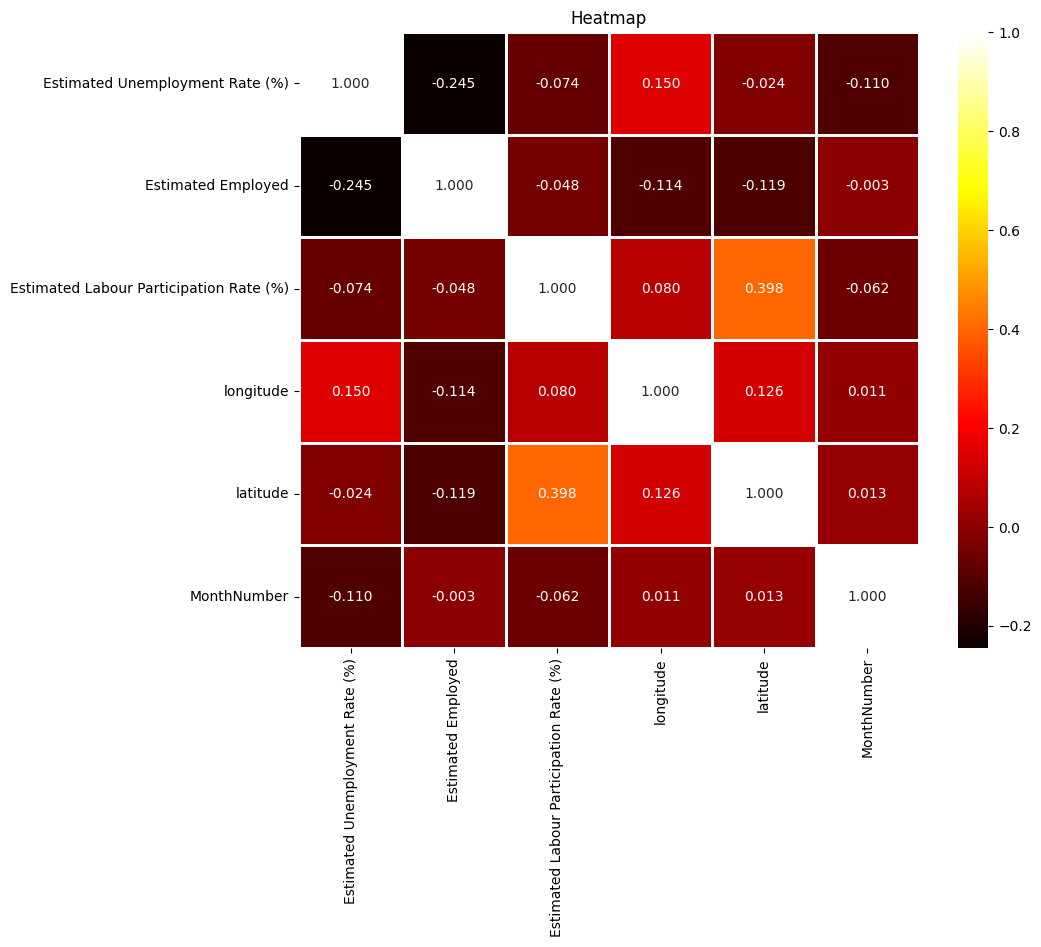

In [ ]:
heatMap = df[['Estimated Unemployment Rate (%)', 'Estimated Employed',
              'Estimated Labour Participation Rate (%)', 'longitude', 'latitude', 'MonthNumber']]

# Constructing heatmap with correlation values
heatMap = heatMap.corr()

# Plotting the figure
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(heatMap, annot=True, cmap='hot', fmt='.3f', linewidths=1)  # Change 'cmap' to 'coolwarm'
plt.title('Heatmap')
plt.show()


State-wise Average Employment Rate

In [ ]:
import plotly.express as px

newDF = df[['Estimated Unemployment Rate (%)', 'States']]
newDF = newDF.groupby('States').mean().reset_index()
newDF = newDF.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(newDF,
             x='States',
             y='Estimated Unemployment Rate (%)',
             color='States',
             title='State-wise Average Unemployment Rate',
             labels={'Estimated Unemployment Rate (%)': 'Average Unemployment Rate (%)'},
             hover_name='States',
             hover_data={'Estimated Unemployment Rate (%)': True},
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text='Estimated Unemployment Rate (%)'
             )

fig.update_layout(xaxis_title='States', yaxis_title='Average Unemployment Rate (%)',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  )

fig.update_traces(textposition='outside')

fig.show()



Region-wise Unemployment Rate


In [ ]:
# Plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df,
             x='Region',
             y='Estimated Unemployment Rate (%)',  # Corrected 'y' parameter
             animation_frame='MonthName',
             color='States',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()


unemployment rate in each region and state

In [ ]:
# Sunburst chart for unemployment rate region-wise and state-wise
fig = px.sunburst(df,  # Use the correct DataFrame name
                  path=['Region', 'States'],
                  values='Estimated Unemployment Rate (%)',  # Use the correct column name
                  title='Unemployment Rate in Each Region and State',
                  height=650)
fig.show()


c:\Users\kajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\kajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Lockdown Impact on Employment in India

C:\Users\kajal\AppData\Local\Temp\ipykernel_16652\42052409.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



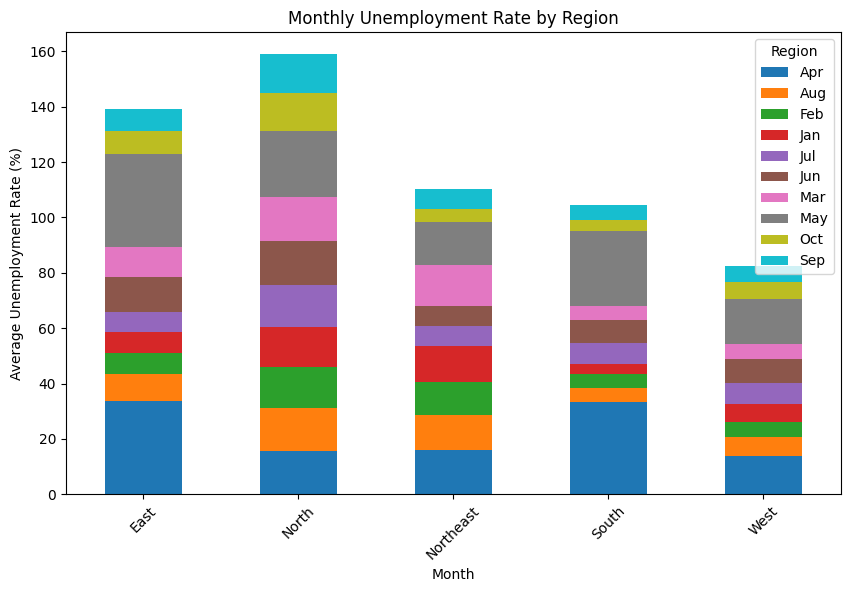

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with data grouped by Region and MonthName
df_grouped = df.groupby(['Region', 'MonthName'])['Estimated Unemployment Rate (%)'].mean().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Monthly Unemployment Rate by Region')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()


C:\Users\kajal\AppData\Local\Temp\ipykernel_16652\2636400693.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




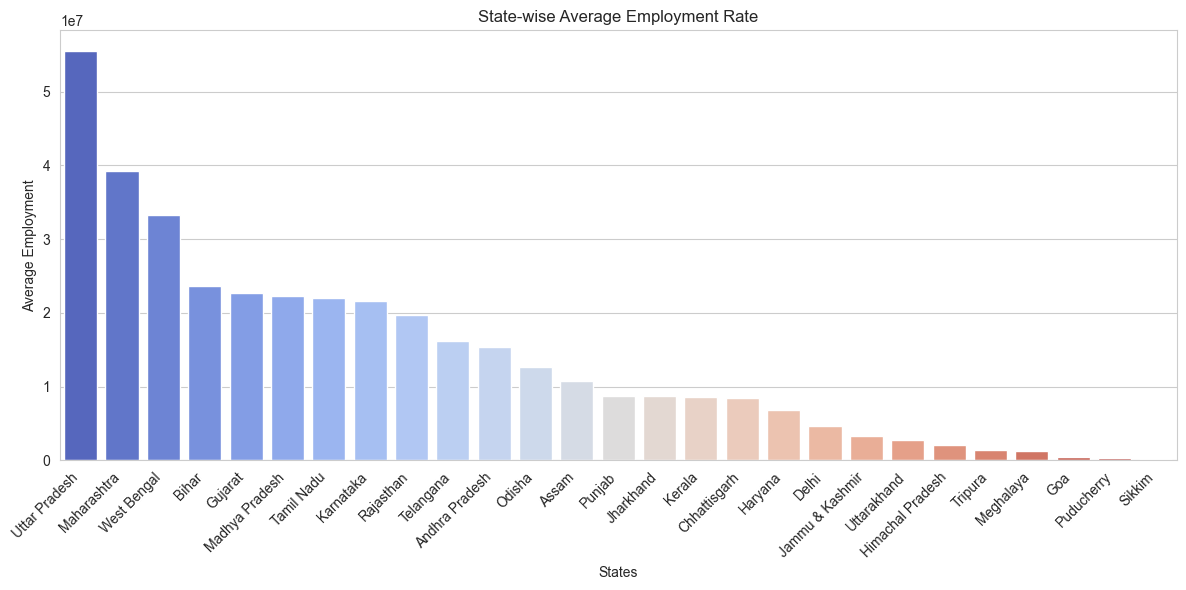

C:\Users\kajal\AppData\Local\Temp\ipykernel_16652\2636400693.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




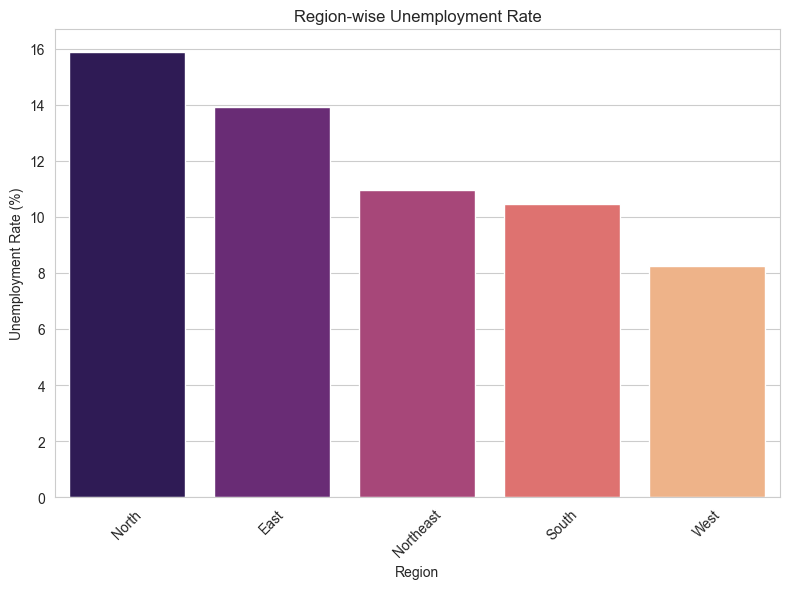

C:\Users\kajal\AppData\Local\Temp\ipykernel_16652\2636400693.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




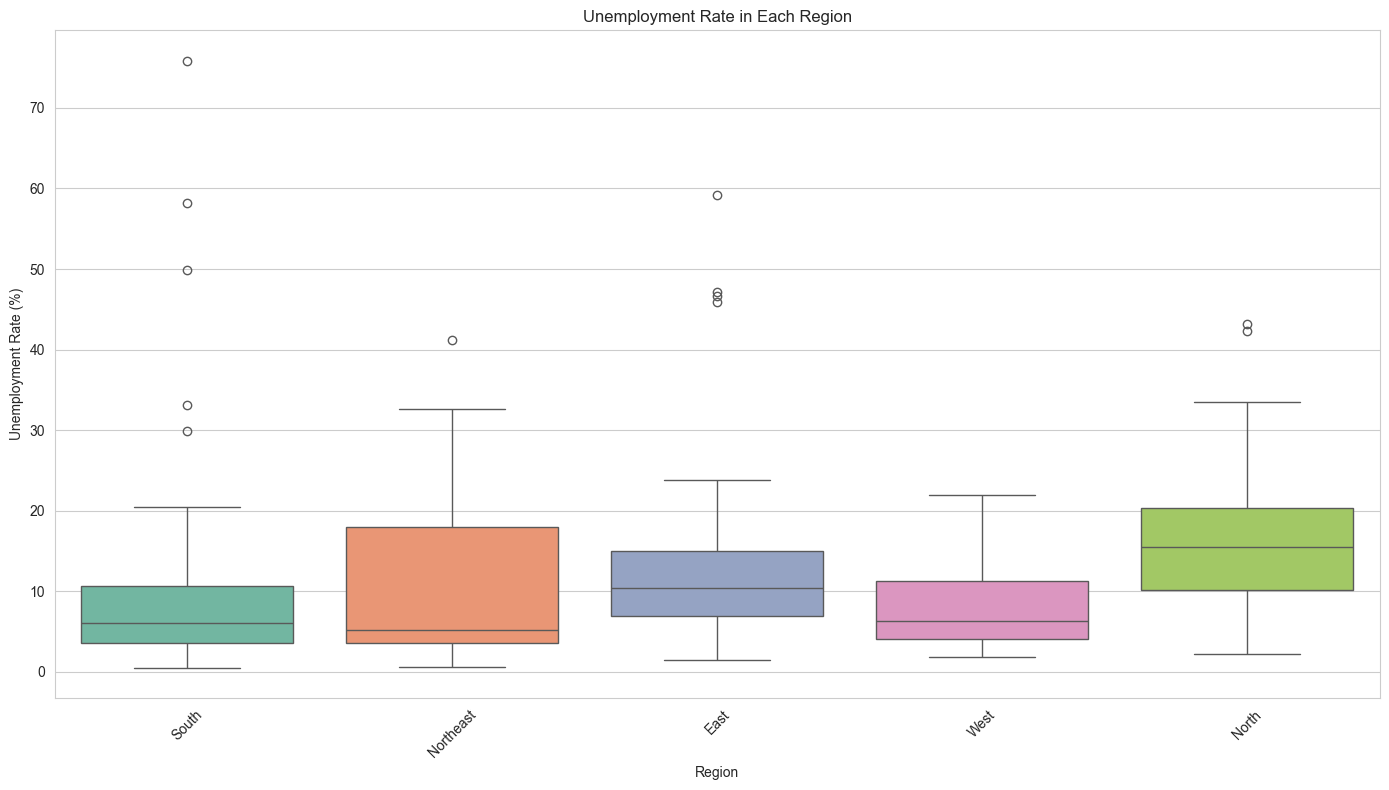

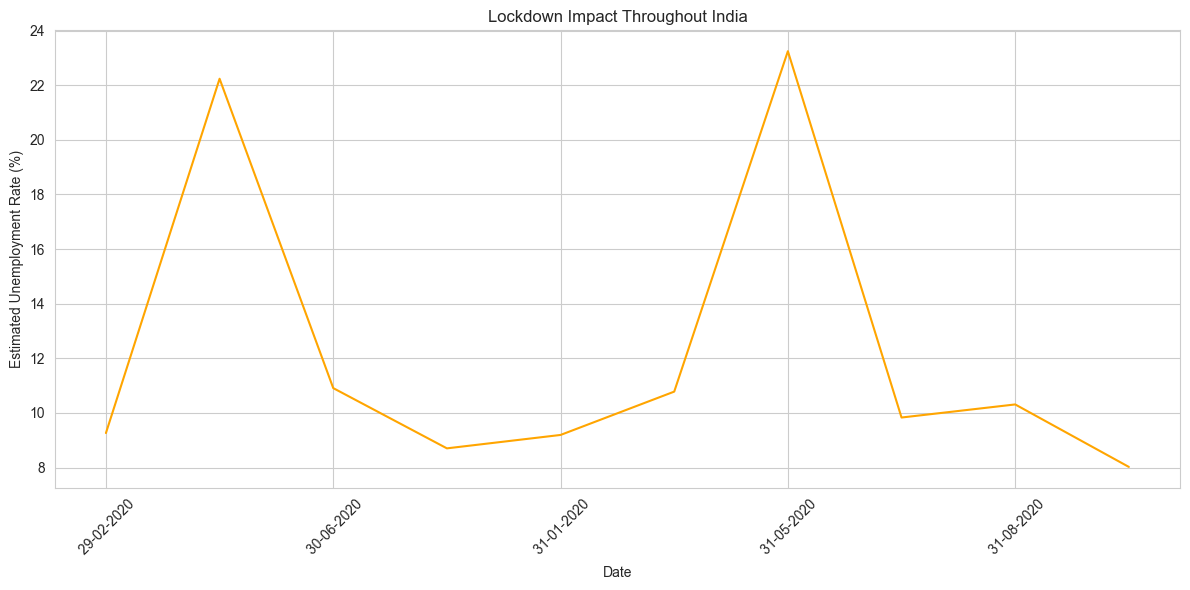

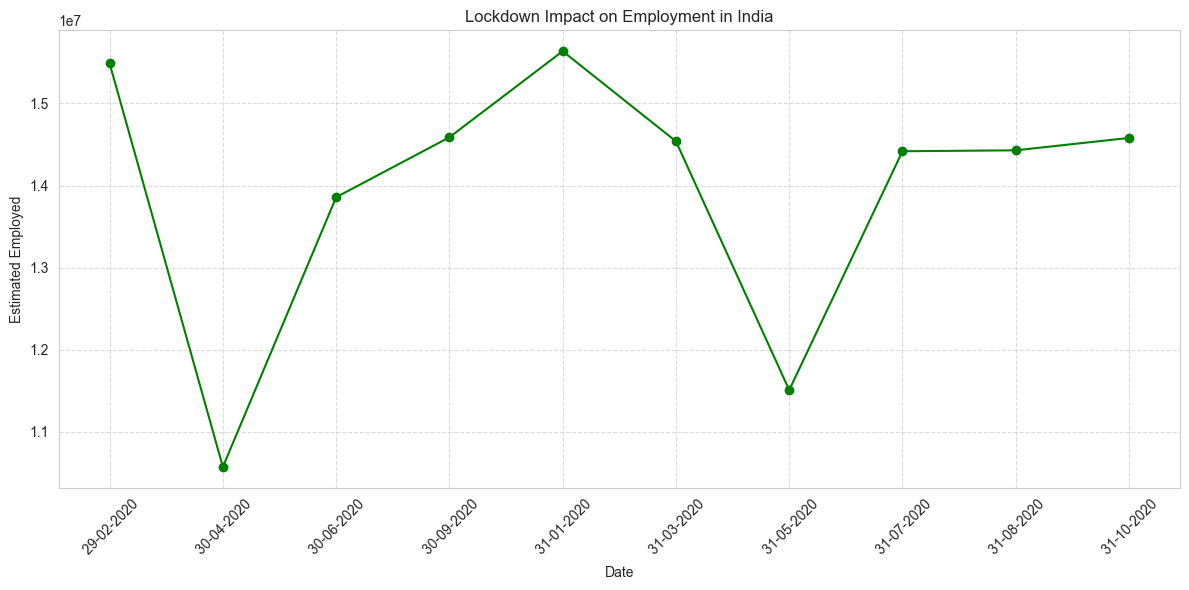

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Data.csv")

# Set style for seaborn
sns.set_style("whitegrid")

# 1. State-wise Average Employment Rate
state_avg_employment = data.groupby('States')['Estimated Employed'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg_employment.index, y=state_avg_employment.values, palette='coolwarm')
plt.title('State-wise Average Employment Rate')
plt.xlabel('States')
plt.ylabel('Average Employment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Region-wise Unemployment Rate
region_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=region_unemployment.index, y=region_unemployment.values, palette='magma')
plt.title('Region-wise Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Unemployment Rate in Each Region and State
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')
plt.title('Unemployment Rate in Each Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Lockdown Impact Throughout India
lockdown_impact = data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(12, 6))
lockdown_impact.plot(color='orange')
plt.title('Lockdown Impact Throughout India')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Lockdown Impact on Employment in India
plt.figure(figsize=(12, 6))
plt.plot(lockdown_employment_impact.index, lockdown_employment_impact.values, marker='o', color='green', linestyle='-')
plt.title('Lockdown Impact on Employment in India')
plt.xlabel('Date')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_geo(df, 'longitude', 'latitude',
                     color="Region",
                     hover_name="States",
                     size="Estimated Unemployment Rate (%)",  # Corrected column name
                     animation_frame="MonthName",
                     scope='asia',
                     title='Lockdown Impact throughout India')

# Setting the duration of each frame in the animation
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

# Updating the geospatial axes ranges and ocean color
fig.update_geos(
    lataxis_range=[5, 35],
    lonaxis_range=[65, 100],
    oceancolor="#6dd5ed",
    showocean=True
)

fig.show()


In [ ]:
import plotly.express as px

# Create animated scatter plot with interactive markers
fig = px.scatter(df, x='Estimated Employed', y='Estimated Unemployment Rate (%)',
                 animation_frame='MonthName', color='Region', hover_name='States',
                 title='Animated Scatter Plot of Estimated Employed vs. Estimated Unemployment Rate Over Time',
                 size='Estimated Labour Participation Rate (%)', size_max=30)

# Set animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200

# Customize marker properties
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Show plot
fig.show()


Statistical Analysis:

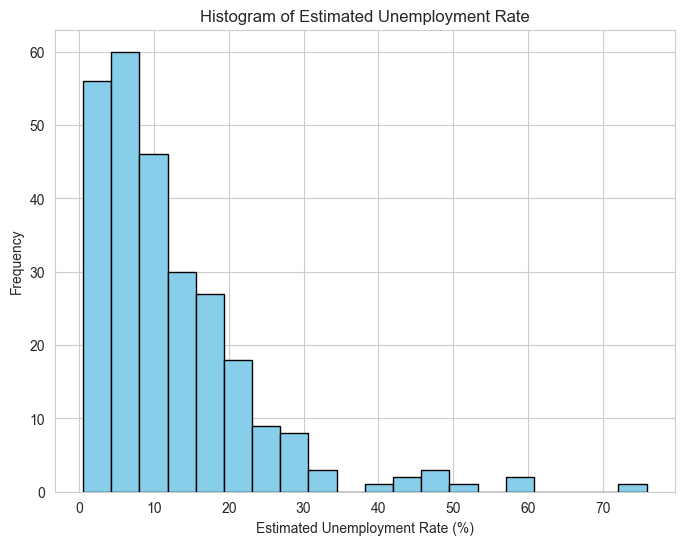

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of Estimated Unemployment Rate
plt.figure(figsize=(8, 6))
plt.hist(df['Estimated Unemployment Rate (%)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Unemployment Rate')
plt.grid(True)
plt.show()


c:\Users\kajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\kajal\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\kajal\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\kajal\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\

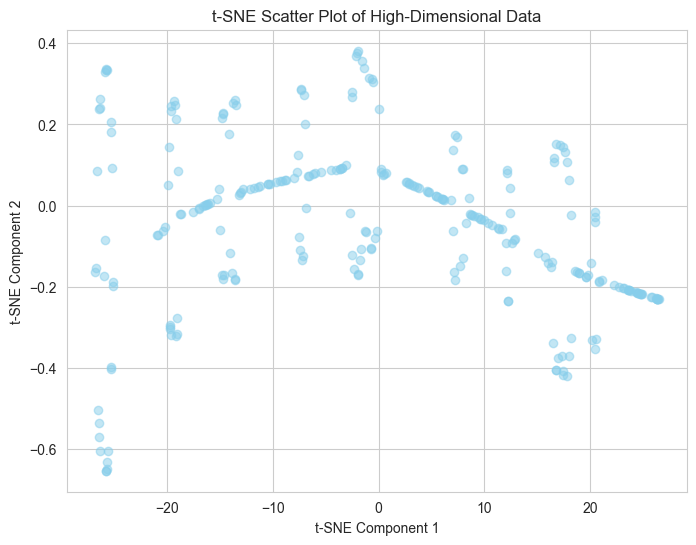

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming X is your high-dimensional data matrix
X = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]

# Perform t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot 2D scatter plot of the t-SNE transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color='skyblue', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot of High-Dimensional Data')
plt.grid(True)
plt.show()
